In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

# Lecture 10: Nearest-Neighbor Classifier

Last update: Feb 13, 2019

<Figure size 432x288 with 0 Axes>

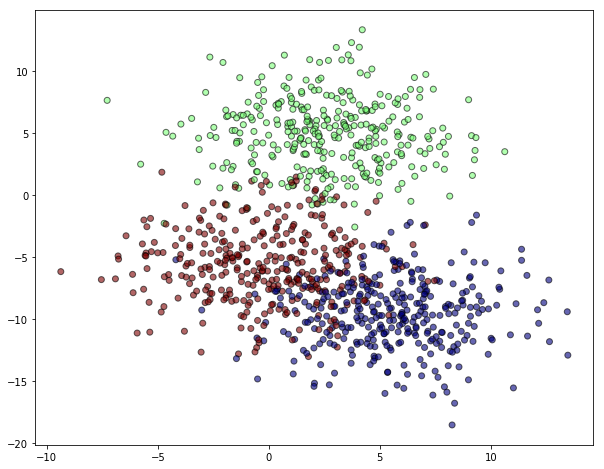

In [2]:
plt.jet() # set the color map. When your colors are lost, re-run this.
import sklearn.datasets as datasets
X, Y = datasets.make_blobs(n_samples=1000, n_features=2, 
                           centers=3, cluster_std=3.0, random_state=10)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', alpha=0.6)

In [3]:
# Dimension of X
print(X.shape)
# Dimension of Y
print(Y.shape)

(1000, 2)
(1000,)


## Spliting into Train/Test/Val

In [4]:
from sklearn.model_selection import train_test_split


X_tv, X_test, Y_tv, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_tv, Y_tv, test_size=0.2, random_state=0)


In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(640, 2)
(200, 2)
(160, 2)


Text(0.5, 1.0, 'Train')

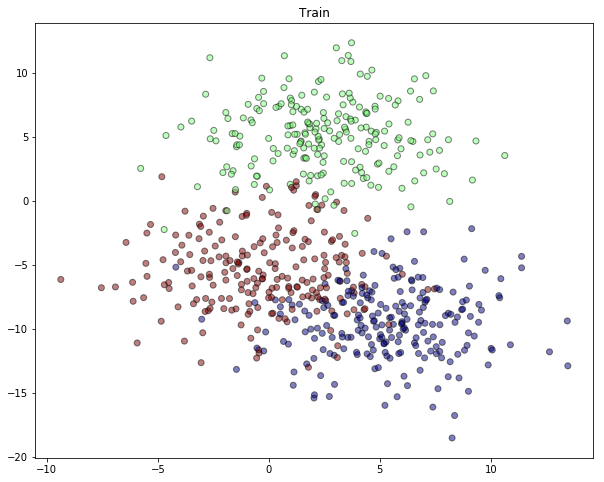

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, edgecolors='k', alpha=0.5)
plt.title('Train')

Text(0.5, 1.0, 'Validation')

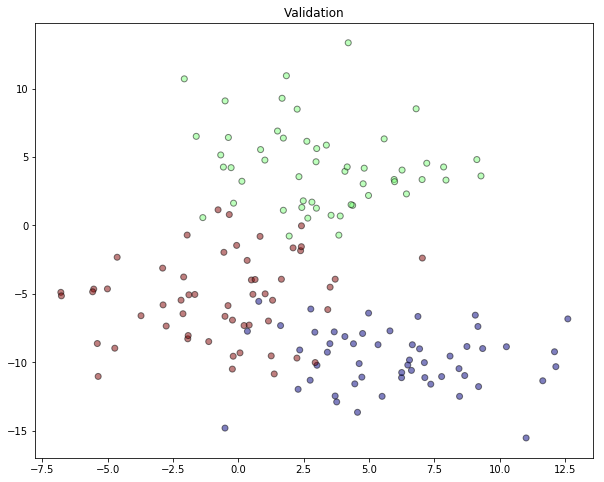

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(X_val[:,0], X_val[:,1], c=Y_val, edgecolors='k', alpha=0.5)
plt.title('Validation')

Text(0.5, 1.0, 'Test')

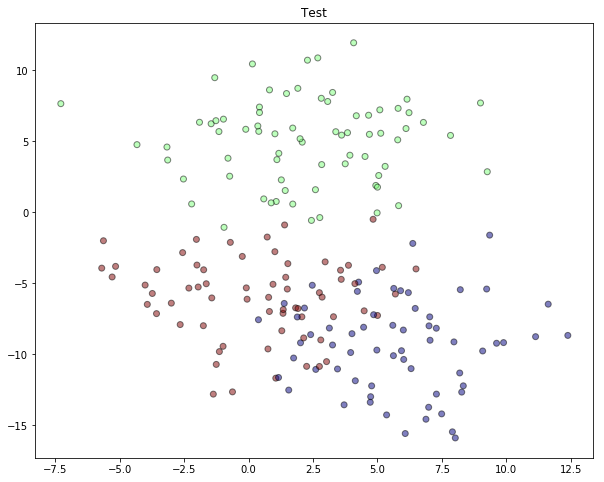

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, edgecolors='k', alpha=0.5)
plt.title('Test')

## k-Nearest Neighbor classifier


The main idea is to classify an example by finding $k$ examples in the train set that are most "similar" to it and predict the most common class among the $k$ examples.


Text(0.27, 0.72, 'Class?')

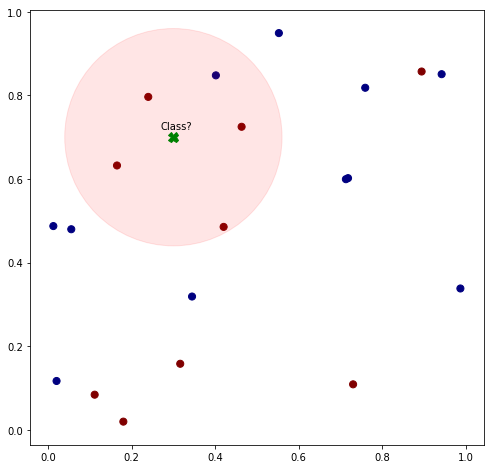

In [9]:
np.random.seed(11)
n = 20
nClasses = 2
px = np.random.rand(n,2)
py = np.random.randint(0,nClasses,(n,))
f = plt.figure(figsize=(10,8),)
ax = f.gca()
plt.scatter(px[:,0],px[:,1],c=py,s=50)
ax.set_aspect('equal')

cx,cy=0.3,0.7
plt.plot(cx,cy,'gX',ms=10)
ax.add_artist(plt.Circle((cx, cy), 0.26, color='r', alpha=0.1))
plt.annotate('Class?',(cx-0.03,cy+0.02))

## KNeighborsClassifier

### Parameters:	
#### n_neighbors : int, optional (default = 5)
Number of neighbors to use by default for kneighbors queries.
#### weights : str or callable, optional (default = ‘uniform’)
weight function used in prediction. Possible values:
- ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
- ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
    
#### algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional
Algorithm used to compute the nearest neighbors:
- ‘ball_tree’ will use BallTree
- ‘kd_tree’ will use KDTree
- ‘brute’ will use a brute-force search.
- ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

Note: fitting on sparse input will override the setting of this parameter, using brute force.

#### leaf_size : int, optional (default = 30)
Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

#### metric : string or callable, default ‘minkowski’
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. 

The Minkowski distance of order ''p'' between two points

$$X=(x_1,x_2,\ldots,x_n)\text{ and }Y=(y_1,y_2,\ldots,y_n) \in \mathbb{R}^n$$

is defined as:

$$D\left(X,Y\right)=\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$$


#### p : integer, optional (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (L1), and euclidean_distance (L2) for p = 2. For arbitrary p, minkowski_distance (Lp) is used.


In [10]:
from sklearn import neighbors
k = 3
weights = 'uniform'
clf = neighbors.KNeighborsClassifier(k, weights=weights)
# create the model
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
def plot_decision_boundary(clf,X,Y,h=0.1):
    from matplotlib.colors import ListedColormap

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % 
              (k, weights))

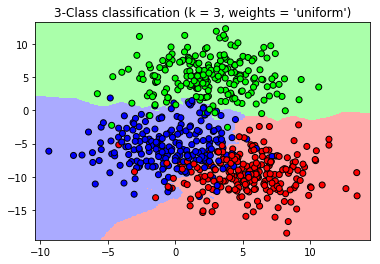

In [12]:
plot_decision_boundary(clf, X_train, Y_train)

In [13]:
k = 5
weights = 'uniform'
clf2 = neighbors.KNeighborsClassifier(k, weights=weights)
clf2.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

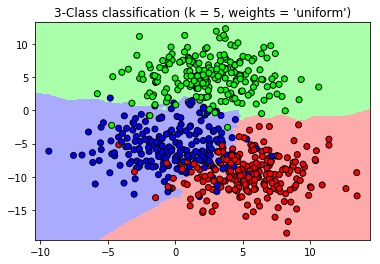

In [14]:
plot_decision_boundary(clf2, X_train, Y_train)

In [15]:
k = 7
weights = 'uniform'
clf3 = neighbors.KNeighborsClassifier(k, weights=weights)
clf3.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

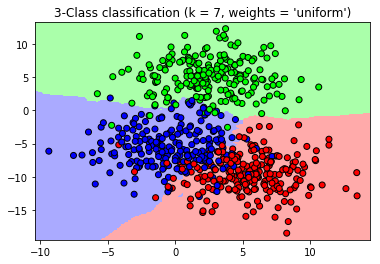

In [16]:
plot_decision_boundary(clf3, X_train, Y_train)

## Train errors

In [17]:
k = 5
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, Y_train)

train_error_rate = sum(clf.predict(X_train) != Y_train)/float(len(Y_train))
print("train error rate = %f" % train_error_rate)

train error rate = 0.078125


## Test errors

In [18]:
test_error_rate = sum(clf.predict(X_test) != Y_test)/float(len(Y_test))
print("test error rate = %f" % test_error_rate)

test error rate = 0.135000


## Tuning for the parameter K

In [19]:
errors = []
krange = np.arange(1,25)
for k in krange:
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, Y_train)
    errors.append(sum(clf.predict(X_val) != Y_val)/float(len(Y_val)))

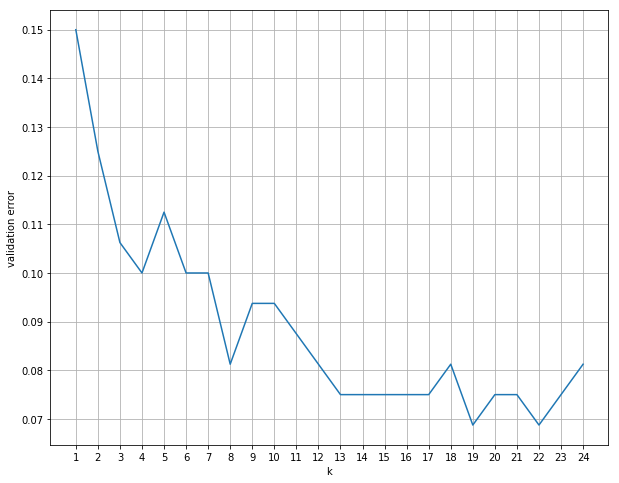

In [20]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.plot(krange,errors)
ax.set_xticks(krange)
ax.set_xlabel('k')
ax.set_ylabel('validation error')
ax.grid()
#ax.set_xlim(220,280)

From the plot, we choose k = ___________

In [21]:
k = 19
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, Y_train)

error_rate = sum(clf.predict(X_test) != Y_test)/float(len(Y_test))
print("error rate = %f" % error_rate)

error rate = 0.145000


## MNIST

<img src="mnistExamples.png">

In [22]:
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
mnist = fetch_openml('mnist_784', version=1)
X_digits, Y_digits = shuffle(mnist.data, mnist.target) # shuffle dataset (which is ordered!)

# choose only 5000  
X_digits = X_digits[-5000:,:] 
Y_digits = Y_digits[-5000:]

print(mnist.data.shape)
print(X_digits.shape, Y_digits.shape)

(70000, 784)
(5000, 784) (5000,)


(784,)
7


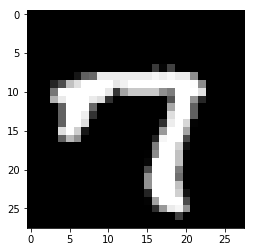

In [23]:
print(X_digits[0,:].shape)
print(Y_digits[0])
plt.imshow(np.reshape(X_digits[0,:],(28,28)),cmap='gray')

<div class="alert alert-block alert-success">
<b>Your Task:</b> Create a kNN model for MNIST. You must properly split data into train, val and test. You should also tune for k using the validation set.
</div>

In [25]:
from sklearn.model_selection import train_test_split


X_tv, X_test, Y_tv, Y_test = train_test_split(
    X_digits, Y_digits, test_size=0.2, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_tv, Y_tv, test_size=0.2, random_state=0)


In [26]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3200, 784)
(1000, 784)
(800, 784)


In [39]:
errors = []
krange = np.arange(1,25)
for k in krange:
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X_train, Y_train)
    errors.append(sum(clf.predict(X_val) != Y_val)/float(len(Y_val)))

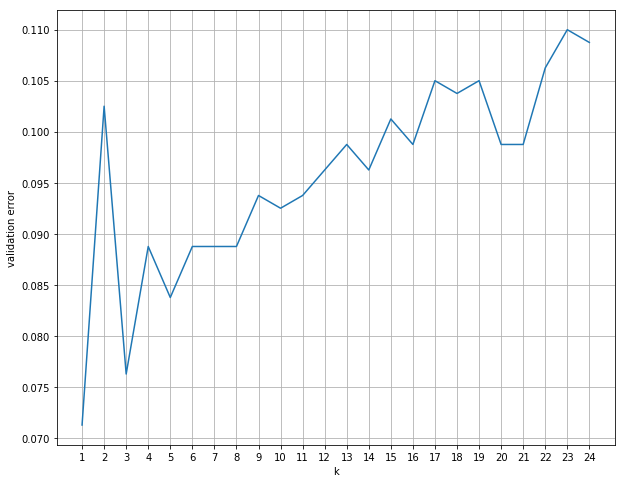

In [40]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.plot(krange,errors)
ax.set_xticks(krange)
ax.set_xlabel('k')
ax.set_ylabel('validation error')
ax.grid()
#ax.set_xlim(220,280)

In [24]:
# code here
from sklearn.metrics import confusion_matrix

pred = clf.predict(X_test)
confusion_matrix(Y_test, pred, labels=[0, 1, 2])

array([[57,  0,  6],
       [ 0, 65,  7],
       [15,  1, 49]])